In [1]:
import pandas as pd
import json
import __CDS__

CDS_list = list(__CDS__.load_CDS().index)

data_fldr = "/l/mesur/aedinge/distortion_polarization/"

with open(data_fldr + "users_2016_activity.txt") as f:
    users_2016 = json.load(f)
    
with open(data_fldr + "users_2020_activity.txt") as f:
    users_2020 = json.load(f)
    
users_2016 = {int(key):val for key,val in users_2016.items()}
users_2020 = {int(key):val for key,val in users_2020.items()}

long_users = [user for user in set(users_2016.keys()).intersection(set(users_2020.keys())) if users_2016[user]>10 and users_2020[user]>10]

tweets_2020 = pd.read_csv(data_fldr + "231109_all_variants_2020.csv", index_col = "Unnamed: 0", lineterminator='\n')
# tweets_2016 = pd.read_csv(data_fldr + "231109_all_variants_2016.csv", index_col = "Unnamed: 0", lineterminator='\n')

In [24]:
rs_20 = pd.DataFrame()
rs_20['user_id'] = tweets_2020['user_id']

user_cts = pd.DataFrame()
user_cts['total'] = pd.Series(users_2020)[long_users]

ngrams_20 = tweets_2020[CDS_list].T

bs=pd.DataFrame(columns=['CDS_prev'])



In [ ]:
import multiprocessing
import timeit
start = timeit.default_timer()

pool = multiprocessing.Pool(16)
hi_ent_2, lo_ent_2, hi_tweets, lo_tweets = zip(*pool.map(null_bs, range(0, 10000)))



In [29]:
import timeit
start = timeit.default_timer()

num_runs = 10000

for i in range(num_runs):
    rs_20['CDS'] = ngrams_20.sample(n=len(CDS_list), replace=True).sum() != 0
    user_cts['CDS'] = rs_20.groupby('user_id').sum()
    
    bs.loc[i] = (user_cts['CDS']/user_cts['total']).mean()
    if i%500 == 0:
        print(i)
        bs.to_csv(data_fldr + "231113_bs_20_res.csv")

    
end = timeit.default_timer()
print(end - start)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
48015.13251841441


In [30]:
bs.to_csv(data_fldr + "231113_bs_20_res.csv")


In [36]:
bs_20 = pd.read_csv(data_fldr + "231113_bs_20_res.csv", index_col = "Unnamed: 0")
bs_16 = pd.read_csv(data_fldr + "231113_bs_16_res.csv", index_col = "Unnamed: 0")

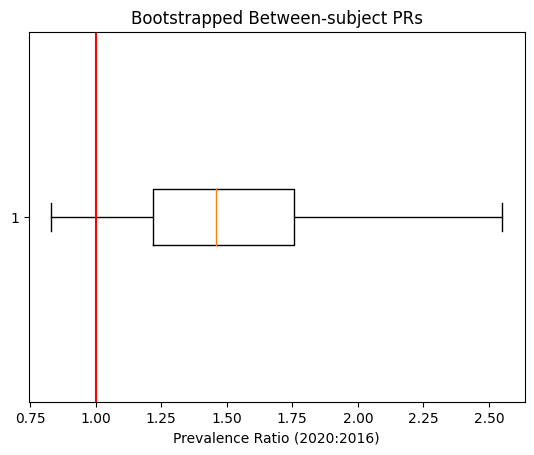

In [46]:
import matplotlib.pyplot as plt

pr = bs_20/bs_16

fig1, ax1 = plt.subplots()

ax1.boxplot(pr, vert=False, showfliers=False, whis=(2.5,97.5))

# ax1.set_xlim([0.8,2.8])

plt.xlabel("Prevalence Ratio (2020:2016)")
plt.title("Bootstrapped Between-subject PRs")
plt.axvline(1, color='r')

In [44]:
(bs_20/bs_16).min()

CDS_prev    0.483871
dtype: float64